In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import osmnx as ox
import seaborn as sns

In [29]:
df = pd.read_csv('data/clean_data_visual.csv.gz')
# drop previous index
df = df.drop(['Unnamed: 0'], axis = 1)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8910938 entries, 0 to 8910937
Data columns (total 10 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   DayOfTheWeek              int64  
 1   MinuteOfTheDay            int64  
 2   Hour                      int64  
 3   Latitude                  float64
 4   Longitude                 float64
 5   Location                  object 
 6   ParkingTimeLimitCategory  float64
 7   AvailableSpace            int64  
 8   AvailablePercentage       float64
 9   PaidParkingArea           int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 679.9+ MB


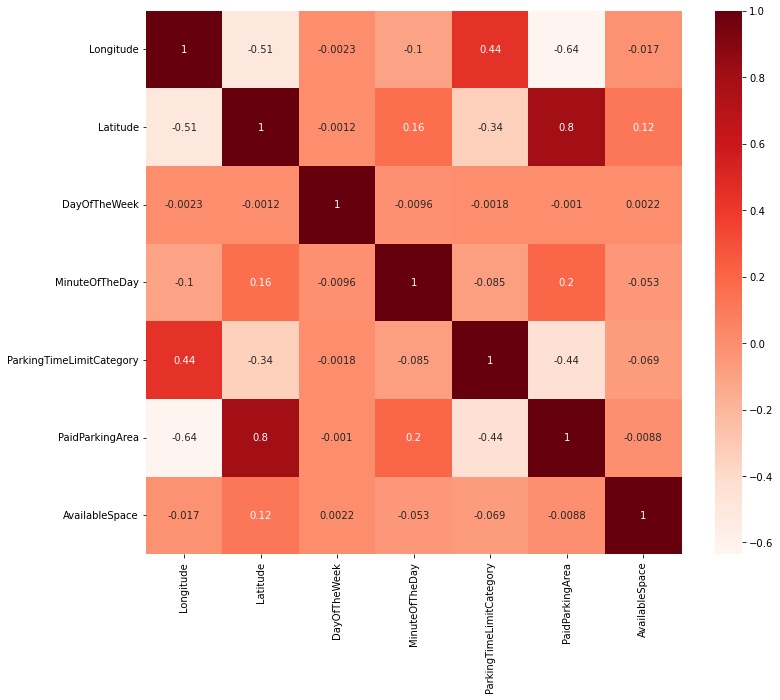

In [31]:
df2 = df[['Longitude','Latitude','DayOfTheWeek','MinuteOfTheDay',
'ParkingTimeLimitCategory','PaidParkingArea','AvailableSpace']]
plt.figure(figsize=(12,10))
cor = df2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [38]:
available = df[df['AvailableSpace'] > 0]
print("data has parking space: ", available.shape[0])
print("data has no parking space: ", df.shape[0] - available.shape[0])

data has parking space:  8263464
data has no parking space:  647474


imbalanced data where majority data shows availbel parking and minority has no parking space

# Time Analysis

In [39]:
df_hour = df[['DayOfTheWeek','Hour', 'AvailablePercentage']]
df_hour = df_hour.loc[df_hour['Hour'] < 22]
grouped_hour = df_hour.groupby(['DayOfTheWeek','Hour']).mean()
unstack_hour = grouped_hour.unstack()
list1 = [0,1,2,3,4,5]
list2 = ['Mon','Tue','Wed','Thu','Fri','Sat']
unstack_hour = unstack_hour.rename(index=dict(zip(list1,list2)))
list3 = [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
list4 = ['8:00','9:00','10:00','11:00','12:00','12:00','14:00','15:00','16:00','17:00','18:00','19:00','20:00','21:00']
plot_df_hour = unstack_hour['AvailablePercentage'].transpose()
plot_df_hour = plot_df_hour.rename(index=dict(zip(list3,list4)))
plot_df_hour

DayOfTheWeek,Mon,Tue,Wed,Thu,Fri,Sat
Hour,,,,,,
8:00,0.768957,0.762842,0.763964,0.768311,0.768325,0.847665
9:00,0.677540,0.671162,0.676557,0.680174,0.680585,0.767894
10:00,0.648962,0.640815,0.636722,0.642536,0.651122,0.717212
11:00,0.624307,0.616190,0.608022,0.613787,0.615277,0.666873
12:00,0.619336,0.614754,0.601814,0.606066,0.597542,0.646469
12:00,0.631636,0.620332,0.610426,0.602927,0.603305,0.635517
14:00,0.659198,0.649220,0.637143,0.642038,0.627812,0.642332
15:00,0.687967,0.678033,0.665891,0.663792,0.647543,0.653441
16:00,0.711117,0.690273,0.680177,0.671213,0.653614,0.653082


<AxesSubplot:xlabel='Hour of the day', ylabel='Average Available Percentage'>

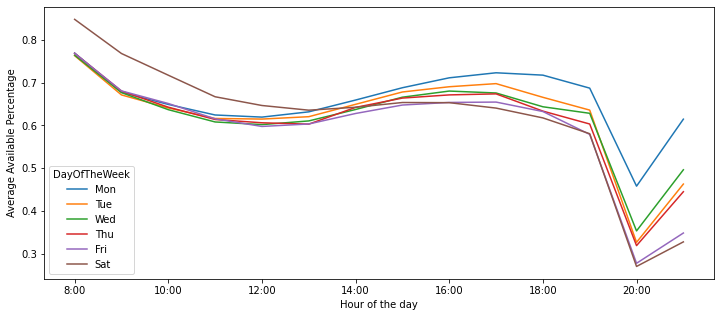

In [40]:
plot_df_hour.plot(figsize=(12, 5),
xlabel='Hour of the day', ylabel='Average Available Percentage')

<AxesSubplot:xlabel='Day of the week', ylabel='Average Available Percentage'>

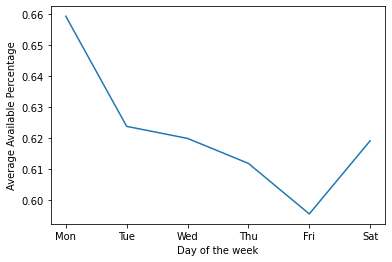

In [41]:
agg_week_available = pd.DataFrame()
for i in plot_df_hour:
    agg_week_available[i] = pd.Series(plot_df_hour[i].mean())
agg_week_available.transpose().plot(legend=False,
xlabel='Day of the week', ylabel='Average Available Percentage')


# Other features analysis

In [42]:
ParkingTimeLimitCategoryAll = df['ParkingTimeLimitCategory'].value_counts().sort_index()
ParkingTimeLimitCategory = available['ParkingTimeLimitCategory'].value_counts().sort_index()

<AxesSubplot:title={'center':'Occupany Percentage by Parking Time Limit Category \n'}, xlabel='Time Limit (minutes)', ylabel='Occupany Percentage'>

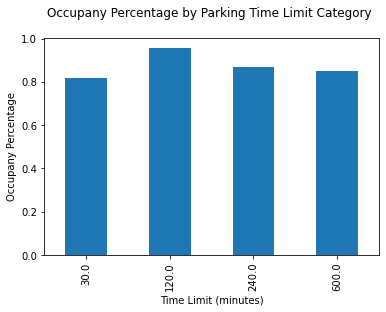

In [43]:
agg_category = ParkingTimeLimitCategory / ParkingTimeLimitCategoryAll
agg_category.plot.bar(title="Occupany Percentage by Parking Time Limit Category \n", 
xlabel='Time Limit (minutes)', ylabel='Occupany Percentage')

# Location analysis

In [45]:
location = df[["Location",'Longitude','Latitude','AvailablePercentage']]
loc_df = location.groupby("Location").mean()

In [46]:
loc_df = loc_df.reset_index(drop=True)
loc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Longitude            472 non-null    float64
 1   Latitude             472 non-null    float64
 2   AvailablePercentage  472 non-null    float64
dtypes: float64(3)
memory usage: 11.2 KB


In [48]:
points = loc_df.to_numpy()
len(points)

472

In [49]:
import folium
from folium import plugins
m1 = folium.Map(location=[47.6256, -122.3344], zoom_start=14)
plugins.HeatMap(points, radius = 18, min_opacity = 0.1, max_val = 50,gradient={.5: 'blue', .7: 'lime', .95: 'red'}).add_to(m1)
# you can run this command to save the map webpage
m1.save('data/map1.html')
m1

# if you're getting "Make this notebook trusted to load map : File -> Trust Notebook"
# switch to another browser (safari) might help

/var/folders/50/_bd3qq2s24384tp_h3lqyhgh0000gn/T/ipykernel_44433/3190825575.py:4: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  plugins.HeatMap(points, radius = 18, min_opacity = 0.1, max_val = 50,gradient={.5: 'blue', .7: 'lime', .95: 'red'}).add_to(m1)
